# Supervised learning introduction, K-Nearest Neighbors (KNN)
-----


#### 1. Read data

The provided three files (glass.data, glass.tag, glass.names) contains a small dataset. "[The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)"

 - read the content of the glass.data file as a pandas dataframe
 - use the column names found in the glass.names file
 - if needed, handle the missing values
 - get rid of the ID column
 - separate the GlassType from the dataset and store it in a one-hot encoded manner (if we have 3 classes, than instead of 1, 2, 3 we use [1, 0, 0], [0, 1, 0] and [0, 0, 1]. So each dimension represents a class and 1 means the sample belongs to that class, 0 is the opposite)
    - be careful, the data contains only 1-2-3-5-6-7, 4 is missing! Convert 5 $\to$ 4, 6 $\to$ 5 and 7 $\to$ 6 and then apply the one-got encoding
    - also keep the converted labels, where y is 1-2-3-4-5-6, we will need them later
 
-----

#### 2. \& 3. Implement KNN

Implement the K-nearest neighbors regression algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporing the given class divided by **k** (for example if **k** is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). 

Complete the function!

```python
def knn_classifier(k, X_train, y_train, X_test):
    ...
    return predictions
```
 - **k** is the number of neighbors to be considered
 - **X_train** is the training data points
 - **X_test** is the test data points
 - **y_train** is the labels for the training data
 - assume that **y_test** is one-hot encoded.

A valid-syntaxed input looks like:
````python
k = 2
X_train = [[0.9, 0.2, 0.8] , [-1.2, 1.5, 0.7], [5.8, 0.0, 0.9], [6.2, 0.9, 0.9]]
y_train = [[0, 1], [0, 1], [1, 0], [0, 1]]
X_test  = [[0.8, 0.8, 0.6], [0.5, 0.4, 0.3]]
```

Here, it means that the training data consists of 4 points, each point is placed in a 3 dimensional space. And there are two possible classes for each point and there are two data points for that predictions is needed.

#### 4. Predictions & interpretation

- use every second (0, 2, 4, etc indicies) datapoint as training data and use the rest (1, 3, 5, ...) as test data
- generate predictions with the implemented KNN with k=5
- calculate the accuracy and the confusion matrix for the predictions
- if the probability is the same for two or more classes select the first one from the left in the one-hot encoded version (or which has the smallest number in the original dataset)

-----

#### 5. Compare it to Sklearn's KNN
- using the same train/test split generate predictions with sklearn KNNs. Use 5 neighbors again
- are the predictions the same as for our implementation? (they should be)
   - note: to get sklearn perform the same algorithm as out implementation it expects you to provide non one-hot encoding labels. That's why we kept them in the first exercise


-----


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# Task 1

In [2]:
df = pd.read_csv("glass.data", sep=",", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Attribute Information:
    1. Id number: 1 to 214
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium
    8. Ca: Calcium
    9. Ba: Barium
    10. Fe: Iron
    11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

In [4]:
# using the column names found in the glass.names file
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df.columns = columns

In [5]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
# dropping the Id column
df = df.drop(['Id'], axis=1)

In [7]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
# no missing values to handle
df.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [9]:
# dropping the target variables to only leave the features
df2 = df.drop(['Type of glass'], axis = 1)

In [10]:
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [11]:
# the target variables
glass_type = list(df['Type of glass'])
labels = list(df['Type of glass'])

In [12]:
# converting the numbering
for i in range(len(labels)):
    if labels[i] == 5:
        labels[i] = 4
    elif labels[i] == 6:
        labels[i] = 5
    elif labels[i] == 7:
        labels[i] = 6

In [13]:
hot_labels = [[0 for col in range(6)] for row in range(len(df))]

In [14]:
# one-hot encoding
for i in range(len(labels)):
    if labels[i] == 1:
        hot_labels[i] = [1, 0, 0, 0, 0, 0]
    elif labels[i] == 2:
        hot_labels[i] = [0, 1, 0, 0, 0, 0]
    elif labels[i] == 3:
        hot_labels[i] = [0, 0, 1, 0, 0, 0]
    elif labels[i] == 4:
        hot_labels[i] = [0, 0, 0, 1, 0, 0]
    elif labels[i] == 5:
        hot_labels[i] = [0, 0, 0, 0, 1, 0]
    elif labels[i] == 6:
        hot_labels[i] = [0, 0, 0, 0, 0, 1]

# Task 2 & 3

In [15]:
def euclidean(vec1, vec2):
    return np.linalg.norm(vec1 - vec2, axis=1)

In [16]:
def knn(X_train, X_test, y_train, k):
    
    neighbors = []
    List = []
    
    for i in np.array(X_test):
        
        # calculating L2 distances for the i-th vector of X_test and each vector of X_train
        distances = euclidean(i, np.array(X_train))
        
        # enumerating the distances so we can see which distance belongs to which vector
        enumerated = list(enumerate(distances))
        
        # sorting the previous list by increasing order and only leaving the k smallest values
        sorted_dists = sorted(enumerated, key=lambda x: x[1])[:k]
        
        # taking the number of the closest vectors out 
        for j in range(len(sorted_dists)):
            List.append(sorted_dists[j][0])
            
        neighbors.append(List)
        List = []
        
    neighbors = np.array(neighbors)
    predictions = np.array(y_train)[neighbors].sum(axis=1)/k
    
    return predictions

In [17]:
X_train = [[0.9, 0.2, 0.8] , [-1.2, 1.5, 0.7], [5.8, 0.0, 0.9], [6.2, 0.9, 0.9]]
y_train = [[0, 1], [0, 1], [1, 0], [0, 1]]
X_test  = [[0.8, 0.8, 0.6], [0.5, 0.4, 0.3]]

In [18]:
knn(X_train, X_test, y_train, 2)

array([[0., 1.],
       [0., 1.]])

# Task 4

In [19]:
# train-test split
df_train = df2.iloc[::2, :]
df_test = df2.iloc[1::2, :]
df_train_y = hot_labels[0::2]
df_test_y = hot_labels[1::2]

In [20]:
# normalizing the feature variables
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.fit_transform(df_test)

In [21]:
# predicting using our knn classifier
predictions = knn(df_train, df_test, df_train_y, 5)

In [22]:
# looking for the max values in the prediction, getting its index and adding one to it to have the right label values in the end
max_index = predictions.argmax(axis=1)+1
max_index

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 3, 1, 6, 1, 4, 4, 2, 2, 2,
       1, 1, 5, 2, 2, 1, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6])

In [23]:
# getting the right target variables from the dataset to calculate accuracy
max_index_y = []

for i in df_test_y:
    max_index_y.append(i.index(max(i))+1)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy_score(max_index_y, max_index)

0.6728971962616822

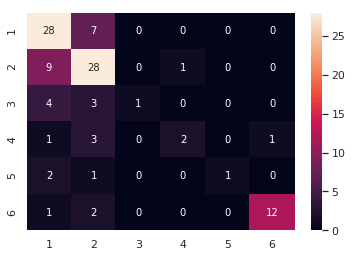

In [25]:
sns.heatmap(confusion_matrix(max_index_y, max_index), annot=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

# Task 5

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# predicting uing sklearn's knn classifier
knn_sk = KNeighborsClassifier(n_neighbors=5)

In [28]:
# target variables without on-hot encoding
train_y3 = labels[0::2]

In [29]:
knn_sk.fit(df_train, train_y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
sk_predicted = knn_sk.predict(df_test)
sk_predicted

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 3, 1, 6, 1, 4, 4, 2, 2, 2,
       1, 1, 5, 2, 2, 1, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6])

In [31]:
# our prediction seems to match sklearn's
list(sk_predicted) == list(max_index)

True